### Loan Default Prediction - Exploratory Data Analysis (EDA)
### INTRODUCTION :
This project aims to analyze loan applications to understand patterns in loan defaults. 
We will perform data cleaning, univariate & bivariate analysis, and visualize key insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load datasets
app_data = pd.read_csv(r"C:\Users\mayan\Downloads\application_data.csv",encoding='ISO-8859-1')
prev_app_data = pd.read_csv(r"C:\Users\mayan\Downloads\previous_application.csv",encoding='ISO-8859-1')
col_desc = pd.read_csv(r"C:\Users\mayan\Downloads\columns_description.csv",encoding='ISO-8859-1')  # Data dictionary

In [3]:
# Display basic info
print("Application Data Overview:")
print(app_data.info())

print("\nPrevious Application Data Overview:")
print(prev_app_data.info())

Application Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

Previous Application Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKD

In [7]:
# Display first few rows
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Missing Data Analysis
Checking for missing values and their percentage.
Using appropriate imputation strategies:
- Dropping columns with excessive missing values (>50% missing).
- Imputing numerical missing values with the median.
- Imputing categorical missing values with the mode.

In [9]:
# Identify missing values
missing_values = app_data.isnull().sum() / len(app_data) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Missing Values Percentage:\n", missing_values)

Missing Values Percentage:
 COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64


In [11]:
# Drop columns with more than 50% missing values
app_data = app_data.drop(columns=missing_values[missing_values > 50].index)

In [13]:
# Fill missing numerical values with median
for col in app_data.select_dtypes(include=np.number).columns:
    app_data[col].fillna(app_data[col].median(), inplace=True)

In [15]:
# Fill missing categorical values with mode
for col in app_data.select_dtypes(include='object').columns:
    app_data[col].fillna(app_data[col].mode()[0], inplace=True)

### Univariate Analysis  
Analyze Individual Features ( boxplots, countplots)

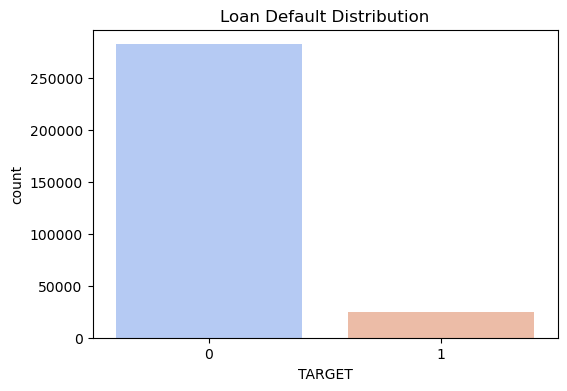

In [17]:
# Univariate Analysis

# Check distribution of TARGET variable
plt.figure(figsize=(6, 4))
sns.countplot(x="TARGET", data=app_data, palette="coolwarm")
plt.title("Loan Default Distribution")
plt.show()

In [19]:
# Percentage of defaulters
defaulters = app_data["TARGET"].value_counts(normalize=True) * 100
print("Defaulters Percentage:\n", defaulters)

Defaulters Percentage:
 TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


#### Outlier Detection 
Identifying outliers using boxplots.

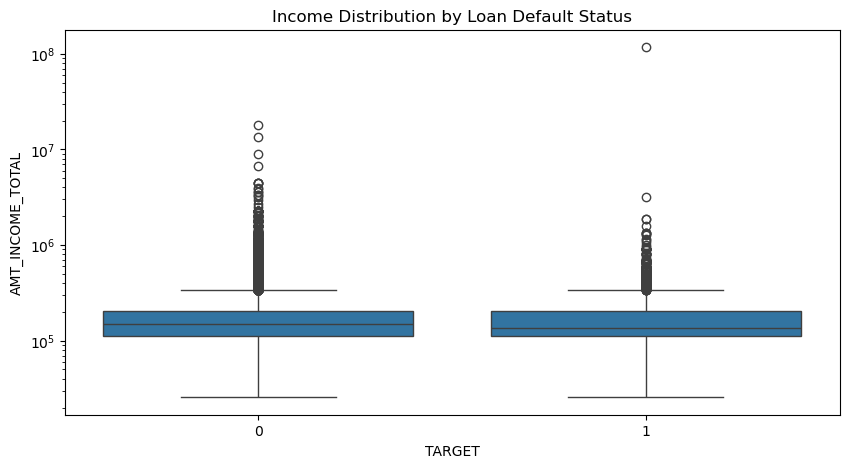

In [21]:
# Identify Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=app_data)
plt.yscale("log")  # Log scale for better visualization
plt.title("Income Distribution by Loan Default Status")
plt.show()

#### Data Imbalance Analysis
- Analyze the target variable(TARGET=1 for defaulters , 0 for others).
- Using Different plots to visualize the imbalance.

TARGET
0    282686
1     24825
Name: count, dtype: int64


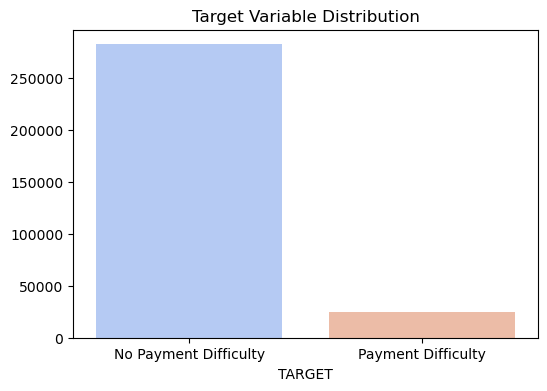

In [23]:
# Data Imbalance Analysis
# Count of target variable
target_counts = app_data['TARGET'].value_counts()
print(target_counts)

# Plotting the imbalance
plt.figure(figsize=(6,4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='coolwarm')
plt.xticks([0, 1], ["No Payment Difficulty", "Payment Difficulty"])
plt.title("Target Variable Distribution")
plt.show()

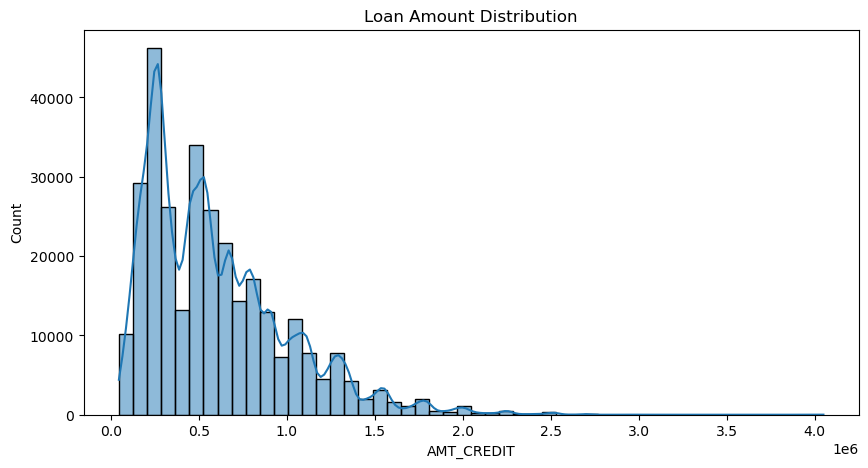

In [25]:
# Loan Amount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(app_data["AMT_CREDIT"], bins=50, kde=True)
plt.title("Loan Amount Distribution")
plt.show()

#### Bivariate Analysis
 Exploring Relationship between Variables

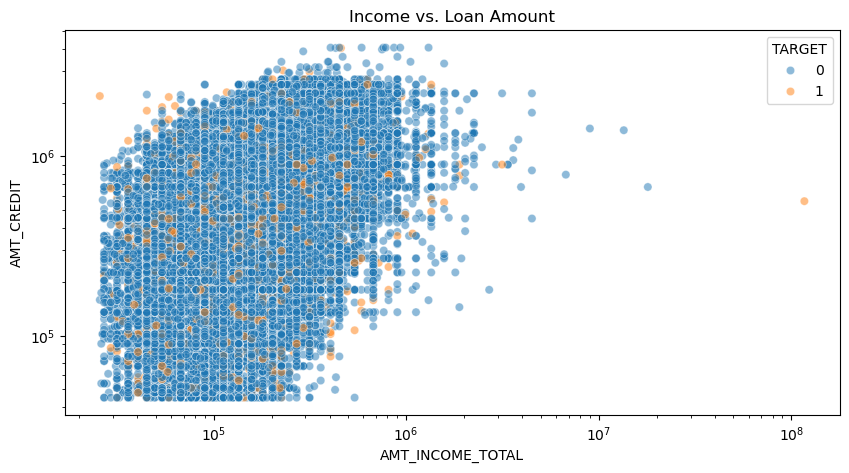

In [27]:
# Bivariate Analysis

# Income vs. Loan Amount
plt.figure(figsize=(10, 5))
sns.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", hue="TARGET", data=app_data, alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.title("Income vs. Loan Amount")
plt.show()

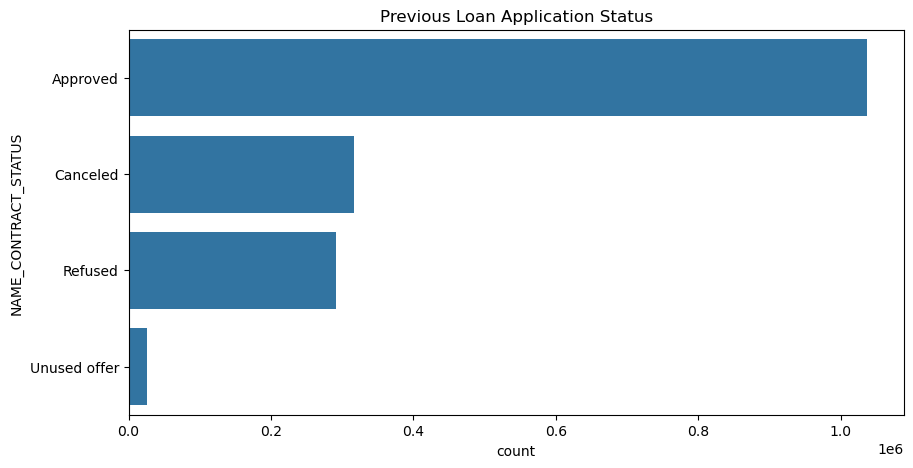

In [29]:
# Previous Loan Analysis
plt.figure(figsize=(10, 5))
sns.countplot(y="NAME_CONTRACT_STATUS", data=prev_app_data, order=prev_app_data["NAME_CONTRACT_STATUS"].value_counts().index)
plt.title("Previous Loan Application Status")
plt.show()

#### Segmented Variate Analysis
Compare features for defaulters vs non-defaulters

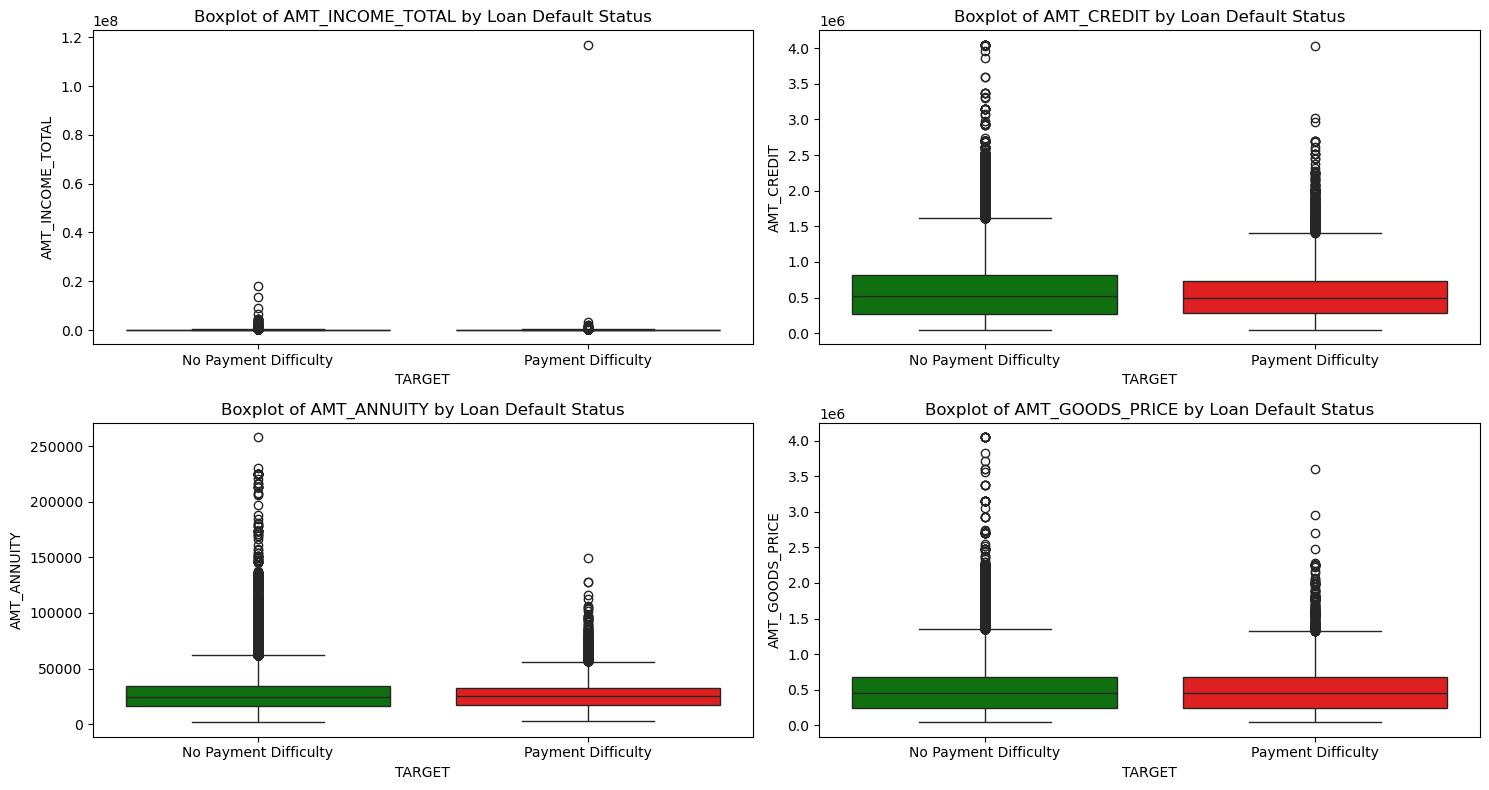

In [37]:
# Segmented Variate Analysis
# List of financial features for comparison
# Boxplots help visualize median, quartiles, and outliers to compare defaulters vs non-defaulters.

features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
plt.figure(figsize=(15, 8))

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=app_data['TARGET'], y=app_data[col], palette=['green', 'red'])
    plt.xticks([0, 1], ["No Payment Difficulty", "Payment Difficulty"])
    plt.title(f"Boxplot of {col} by Loan Default Status")

plt.tight_layout()
plt.show()

In [31]:
# Merge previous loan data with current applications
merged_data = app_data.merge(prev_app_data, on="SK_ID_CURR", how="left")

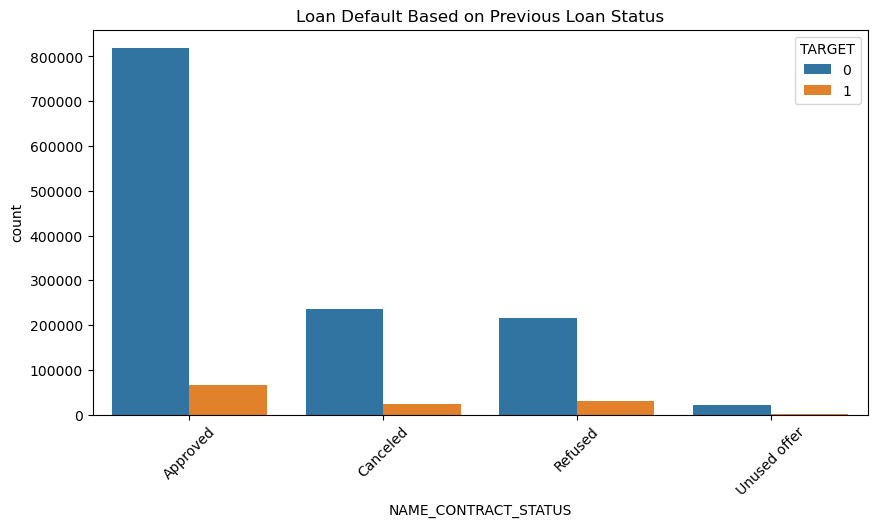

In [32]:
# Check how previous loan status affects defaults
plt.figure(figsize=(10, 5))
sns.countplot(x="NAME_CONTRACT_STATUS", hue="TARGET", data=merged_data, order=merged_data["NAME_CONTRACT_STATUS"].value_counts().index)
plt.title("Loan Default Based on Previous Loan Status")
plt.xticks(rotation=45)
plt.show()

#### Top 10 Correlations

In [39]:
# Find top 10 correlations (excluding TARGET variable)
# Select only numeric columns and calculate correlation
numeric_data = app_data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

# Find and print top 10 correlations
top_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(10)
print("Top 10 Correlations:\n", top_corr)

Top 10 Correlations:
 SK_ID_CURR                    SK_ID_CURR                      1.000000
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998491
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997260
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993838
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989001
AMT_GOODS_PRICE               AMT_CREDIT                      0.986734
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986610
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.971950
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.963610
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.950842
dtype: float64


#### Heatmap Visualization

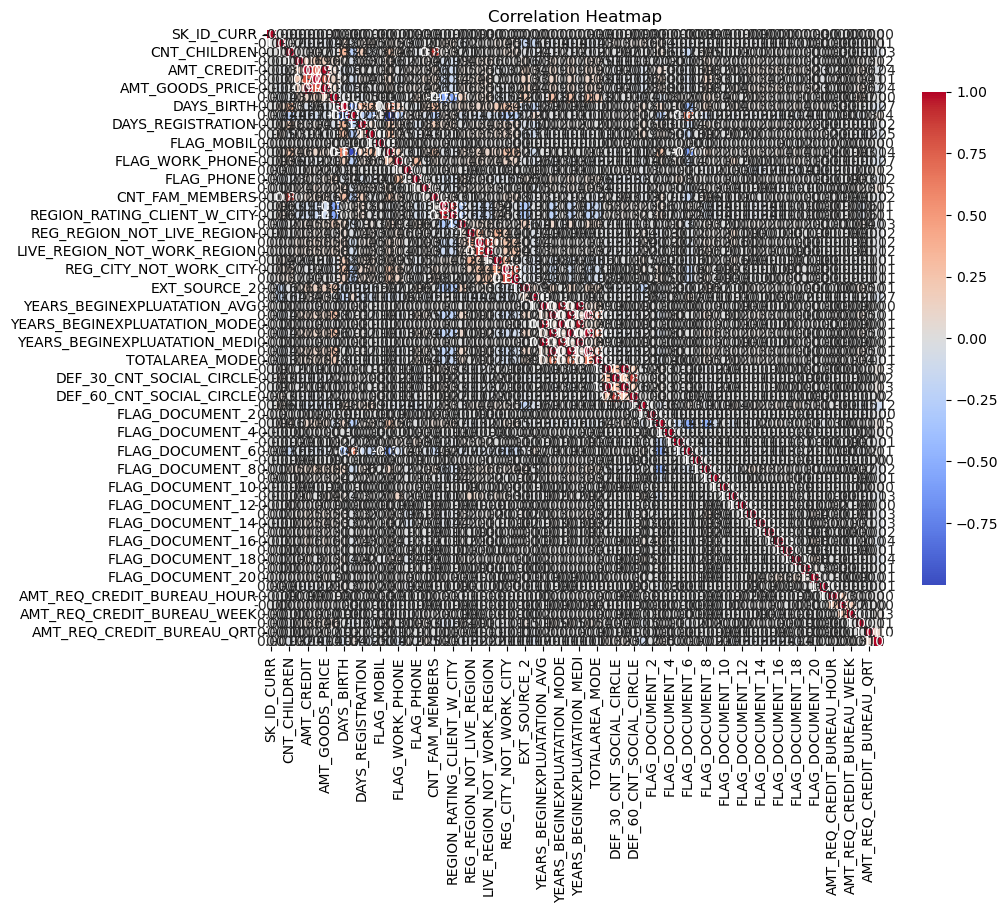

In [41]:
# A heatmap visualization of the correlation matplotlib

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()